## Importing and reading the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from datetime import datetime

Stock data

In [3]:
nike_stock=pd.read_csv('/content/drive/MyDrive/VNP_Proekt/NKE.csv')

In [4]:
nike_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-14,81.239998,81.690002,80.510002,81.029999,77.932030,7266100
1,2019-08-15,80.930000,81.300003,79.440002,79.510002,76.470139,6713600
2,2019-08-16,80.089996,80.559998,79.250000,80.279999,77.210701,5649000
3,2019-08-19,82.000000,82.339996,80.830002,81.129997,78.028206,7027900
4,2019-08-20,80.720001,81.230003,79.449997,80.529999,77.451149,5903100


ESG data

In [5]:
json_file_path = '/content/drive/MyDrive/VNP_Proekt/nike_esg.json'
with open(json_file_path, 'r') as json_file:
    json_data = json.load(json_file)

result_data = json_data['esgChart']['result']

data_list = []

for item in result_data:
    peer_group = item['peerGroup']
    symbol_series = item['symbolSeries']
    peer_series = item['peerSeries']

    for i in range(len(symbol_series['timestamp'])):
        timestamp = symbol_series['timestamp'][i]
        esg_score = symbol_series['esgScore'][i]
        governance_score = symbol_series['governanceScore'][i]
        environment_score = symbol_series['environmentScore'][i]
        social_score = symbol_series['socialScore'][i]

        data_list.append({
            'PeerGroup': peer_group,
            'Timestamp': timestamp,
            'ESGScore': esg_score,
            'GovernanceScore': governance_score,
            'EnvironmentScore': environment_score,
            'SocialScore': social_score,
            'SeriesType': 'symbolSeries'
        })

    if peer_series:
        for i in range(len(peer_series['timestamp'])):
            timestamp = peer_series['timestamp'][i]
            esg_score = peer_series['esgScore'][i]
            governance_score = peer_series['governanceScore'][i]
            environment_score = peer_series['environmentScore'][i]
            social_score = peer_series['socialScore'][i]

            data_list.append({
                'PeerGroup': peer_group,
                'Timestamp': timestamp,
                'ESGScore': esg_score,
                'GovernanceScore': governance_score,
                'EnvironmentScore': environment_score,
                'SocialScore': social_score,
                'SeriesType': 'peerSeries'
            })

nike_esg = pd.DataFrame(data_list)


In [6]:
nike_esg.head()

,PeerGroup,Timestamp,ESGScore,GovernanceScore,EnvironmentScore,SocialScore,SeriesType
0,Textiles & Apparel,1409529600,73.0,75.0,69.0,75.0,symbolSeries
1,Textiles & Apparel,1412121600,73.0,75.0,69.0,75.0,symbolSeries
2,Textiles & Apparel,1414800000,73.0,75.0,69.0,75.0,symbolSeries
3,Textiles & Apparel,1417392000,73.0,75.0,69.0,75.0,symbolSeries
4,Textiles & Apparel,1420070400,73.0,75.0,69.0,75.0,symbolSeries


# Data Exploration and Analysis


> Formating and preprocessing the data


> Data Visuelization


> Comparison





Stock data

In [7]:
#checking shape of data,number of rows and columns
print("Number of rows:",nike_stock.shape[0])
print("Number of columns:",nike_stock.shape[1])

Number of rows: 1006
Number of columns: 7


In [8]:
#summary statistics
nike_stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1.006000e+03
mean,120.340626,121.658658,118.969314,120.320626,118.064609,7.008507e+06
std,24.488519,24.528209,24.362539,24.409507,24.171667,3.971952e+06
min,64.790001,66.879997,60.000000,62.799999,60.881485,1.821900e+06
25%,100.962498,101.842496,100.049999,100.992502,98.033331,4.913100e+06
50%,118.139999,119.740002,117.040000,118.555001,117.119415,6.028550e+06
75%,136.022499,137.407501,134.217502,135.632496,132.799652,7.758825e+06
max,176.350006,179.100006,175.500000,177.509995,174.236023,4.817610e+07


In [9]:
nike_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1006 non-null   object 
 1   Open       1006 non-null   float64
 2   High       1006 non-null   float64
 3   Low        1006 non-null   float64
 4   Close      1006 non-null   float64
 5   Adj Close  1006 non-null   float64
 6   Volume     1006 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.1+ KB


In [10]:
#missing values check
nike_stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
#converting the date column to date format
nike_stock['Date']=pd.to_datetime(nike_stock['Date'])

In [12]:
#sorting the data by date
nike_stock=nike_stock.sort_values('Date')

In [13]:
#reseting the index of data after sorting it by date
nike_stock = nike_stock.reset_index(drop=True)

(array([ 40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 [Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140'),
  Text(160.0, 0, '160'),
  Text(180.0, 0, '180'),
  Text(200.0, 0, '200')])

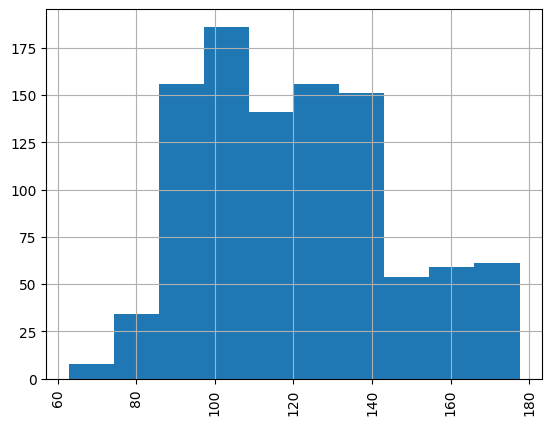

In [14]:
#checking distribution
nike_stock['Close'].hist()
plt.xticks(rotation=90)

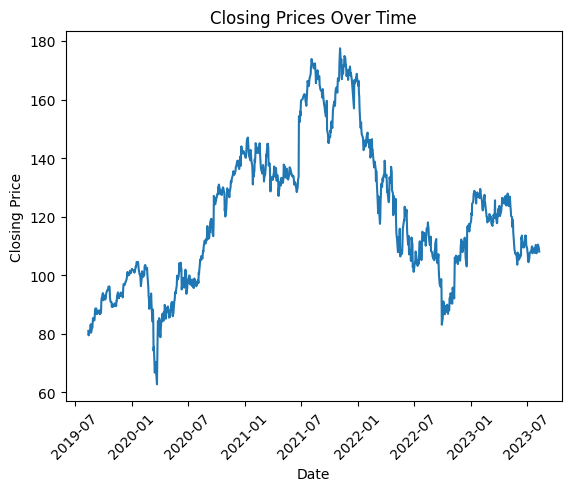

In [15]:
plt.plot(nike_stock['Date'], nike_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time')
plt.xticks(rotation=45)
plt.show()


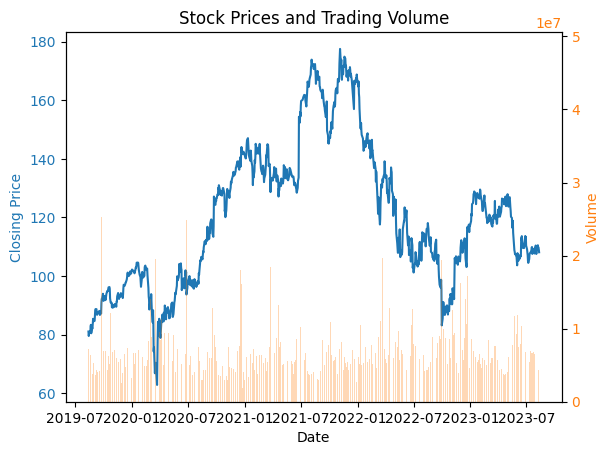

In [16]:
fig, ax1 = plt.subplots()

ax1.plot(nike_stock['Date'], nike_stock['Close'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.bar(nike_stock['Date'], nike_stock['Volume'], alpha=0.3, color='tab:orange')
ax2.set_ylabel('Volume', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('Stock Prices and Trading Volume')
plt.xticks(rotation=45)
plt.show()


ESG data

In [17]:
#fixing and converting the datetime format
unix_timestamp = 1409529600
datetime_object = datetime.utcfromtimestamp(unix_timestamp)
nike_esg['Date'] = nike_esg['Timestamp'].apply(lambda unix_timestamp: datetime.utcfromtimestamp(unix_timestamp))
nike_esg.drop(columns=['Timestamp'], inplace=True)
column_order = ['Date'] + [col for col in nike_esg.columns if col != 'Date']
nike_esg = nike_esg[column_order]

In [97]:
#filling null values with mean
nike_esg.fillna(nike_esg.mean(), inplace=True)
nike_esg.isna().sum()

<ipython-input-97-ae958b2d882e>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



Date                0
ESGScore            0
GovernanceScore     0
EnvironmentScore    0
SocialScore         0
dtype: int64

In [19]:
nike_esg.drop(columns=['PeerGroup'], inplace=True)
nike_esg.drop('SeriesType',axis=1,inplace=True)

In [20]:
nike_esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              192 non-null    datetime64[ns]
 1   ESGScore          192 non-null    float64       
 2   GovernanceScore   192 non-null    float64       
 3   EnvironmentScore  192 non-null    float64       
 4   SocialScore       192 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.6 KB


In [21]:
start_date = '2019-08-14'
end_date = '2023-08-11'
nike_esg = nike_esg.loc[(nike_esg['Date'] >= start_date) & (nike_esg['Date'] <= end_date)]
nike_esg.reset_index(drop=True, inplace=True)

In [22]:
nike_esg

,Date,ESGScore,GovernanceScore,EnvironmentScore,SocialScore
0,2019-09-01,63.880000,58.260000,77.350000,55.600000
1,2019-10-01,63.840000,58.260000,77.240000,55.600000
2,2019-11-01,64.450000,60.480000,77.240000,55.730000
3,2019-12-01,17.070000,8.680000,2.050000,6.340000
4,2020-01-01,17.070000,8.680000,2.050000,6.340000
...,...,...,...,...,...
67,2022-04-01,54.507848,53.176847,51.665263,52.905463
68,2022-05-01,13.861579,5.579444,1.346111,6.451667
69,2022-06-01,54.507848,53.176847,51.665263,52.905463
70,2022-07-01,54.507848,53.176847,51.665263,52.905463


In [23]:
#checking shape of data,number of rows and columns
print("Number of rows:",nike_esg.shape[0])
print("Number of columns:",nike_esg.shape[1])

Number of rows: 72
Number of columns: 5


In [24]:
#summary statistics
nike_esg.describe()

,ESGScore,GovernanceScore,EnvironmentScore,SocialScore
count,72.000000,72.000000,72.000000,72.000000
mean,38.732799,34.532773,32.328660,33.912086
std,20.345556,23.752272,26.464670,23.628267
min,13.530909,5.579444,1.264706,5.560000
25%,15.205000,6.950000,2.050000,6.340000
50%,54.507848,53.176847,51.665263,52.905463
75%,54.507848,53.176847,51.665263,52.905463
max,64.450000,64.869130,77.350000,63.179130


(array([10., 20., 30., 40., 50., 60., 70.]),
 [Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70')])

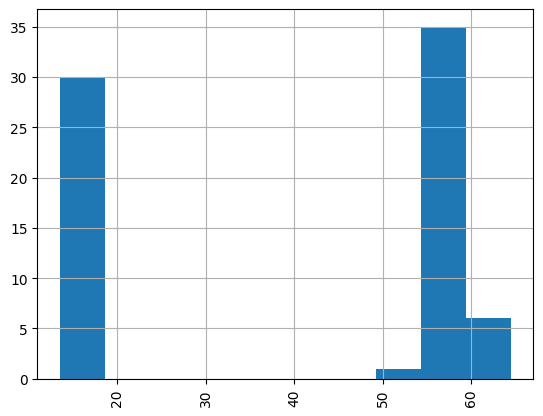

In [25]:
#checking distribution
nike_esg['ESGScore'].hist()
plt.xticks(rotation=90)

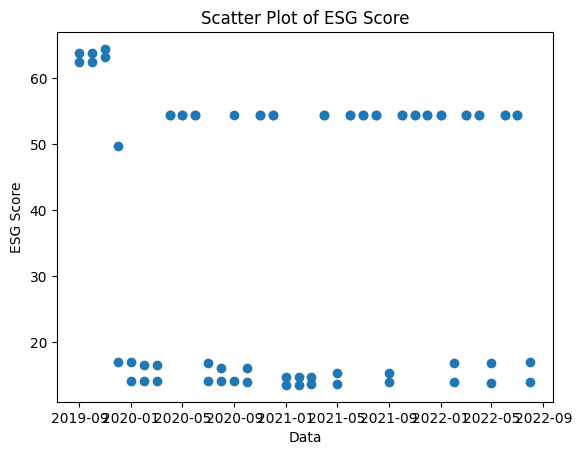

In [26]:
plt.scatter(nike_esg['Date'],nike_esg['ESGScore'])
plt.xlabel('Data')
plt.ylabel('ESG Score')
plt.title('Scatter Plot of ESG Score')
plt.show()


## TSFresh

In [27]:
pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 7.9 MB/s eta 0:00:00


In [28]:
from tsfresh import extract_features

In [29]:
stock_features=extract_features(nike_stock,column_id='Date',column_sort='Date')

Feature Extraction: 100%|██████████| 6036/6036 [03:42<00:00, 27.19it/s]


In [30]:
stock_features.head()

,Open__variance_larger_than_standard_deviation,Open__has_duplicate_max,Open__has_duplicate_min,Open__has_duplicate,Open__sum_values,Open__abs_energy,Open__mean_abs_change,Open__mean_change,Open__mean_second_derivative_central,Open__median,...,Volume__fourier_entropy__bins_5,Volume__fourier_entropy__bins_10,Volume__fourier_entropy__bins_100,Volume__permutation_entropy__dimension_3__tau_1,Volume__permutation_entropy__dimension_4__tau_1,Volume__permutation_entropy__dimension_5__tau_1,Volume__permutation_entropy__dimension_6__tau_1,Volume__permutation_entropy__dimension_7__tau_1,Volume__query_similarity_count__query_None__threshold_0.0,Volume__mean_n_absolute_max__number_of_maxima_7
2019-08-14,0.0,0.0,0.0,0.0,81.239998,6599.937275,NaN,NaN,NaN,81.239998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-15,0.0,0.0,0.0,0.0,80.930000,6549.664900,NaN,NaN,NaN,80.930000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-16,0.0,0.0,0.0,0.0,80.089996,6414.407459,NaN,NaN,NaN,80.089996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-19,0.0,0.0,0.0,0.0,82.000000,6724.000000,NaN,NaN,NaN,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-20,0.0,0.0,0.0,0.0,80.720001,6515.718561,NaN,NaN,NaN,80.720001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analysis of extracted features


> Calculating trend using moving averages

> Calculating seasonality


Stock data

In [31]:
#number of days that have passed since the earliest date in the dataset
nike_stock['NumericalDate'] = (nike_stock['Date'] - nike_stock['Date'].min()).dt.days

In [34]:
window_size=30
nike_stock['Trend'] = nike_stock['Close'].rolling(window=window_size, min_periods=1).mean()

In [35]:
#filtering the data for the last four years
last_four_years = nike_stock[nike_stock['Date'] >= (nike_stock['Date'].max() - pd.DateOffset(years=4))]

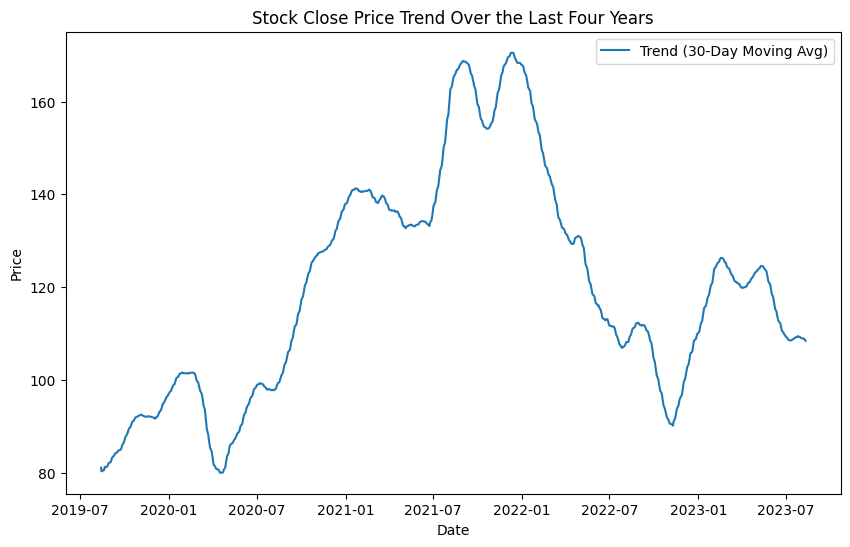

In [36]:
#trend plot over the last four years
plt.figure(figsize=(10, 6))
plt.plot(last_four_years['Date'], last_four_years['Trend'], label=f'Trend ({window_size}-Day Moving Avg)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Close Price Trend Over the Last Four Years')
plt.legend()
plt.show()

In [37]:
# subtracting the trend from the original data to get the seasonality
nike_stock['Seasonality'] = nike_stock['Close'] - nike_stock['Trend']

In [38]:
nike_stock['Seasonality']

0       0.000000
1      -0.759999
2       0.006666
3       0.642498
4       0.034000
          ...   
1001    1.566670
1002    0.845002
1003    0.975669
1004    0.448999
1005   -0.315004
Name: Seasonality, Length: 1006, dtype: float64

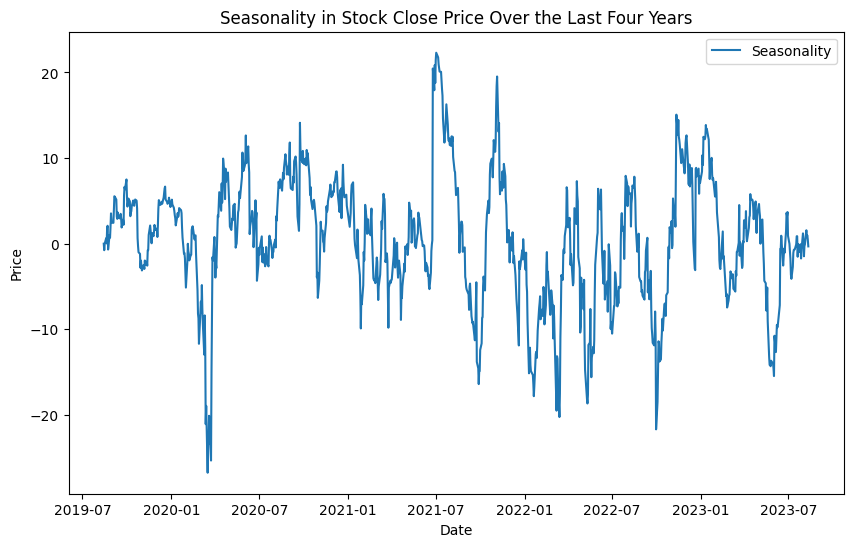

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(nike_stock['Date'], nike_stock['Seasonality'], label='Seasonality')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Seasonality in Stock Close Price Over the Last Four Years')
plt.legend()
plt.show()

ESG data

In [40]:
esg_features=extract_features(nike_esg,column_id='Date',column_sort='Date')

Feature Extraction: 100%|██████████| 144/144 [00:09<00:00, 14.76it/s]


In [41]:
esg_features.head()

,ESGScore__variance_larger_than_standard_deviation,ESGScore__has_duplicate_max,ESGScore__has_duplicate_min,ESGScore__has_duplicate,ESGScore__sum_values,ESGScore__abs_energy,ESGScore__mean_abs_change,ESGScore__mean_change,ESGScore__mean_second_derivative_central,ESGScore__median,...,SocialScore__fourier_entropy__bins_5,SocialScore__fourier_entropy__bins_10,SocialScore__fourier_entropy__bins_100,SocialScore__permutation_entropy__dimension_3__tau_1,SocialScore__permutation_entropy__dimension_4__tau_1,SocialScore__permutation_entropy__dimension_5__tau_1,SocialScore__permutation_entropy__dimension_6__tau_1,SocialScore__permutation_entropy__dimension_7__tau_1,SocialScore__query_similarity_count__query_None__threshold_0.0,SocialScore__mean_n_absolute_max__number_of_maxima_7
2019-09-01,0.0,0.0,0.0,0.0,126.378696,7986.741358,1.381304,-1.381304,NaN,63.189348,...,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,0.0,0.0,0.0,0.0,126.288696,7975.385189,1.391304,-1.391304,NaN,63.144348,...,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-01,0.0,0.0,0.0,0.0,127.750000,8160.692500,1.150000,-1.150000,NaN,63.875000,...,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-01,1.0,0.0,0.0,0.0,66.791739,2763.636242,32.651739,32.651739,NaN,33.395870,...,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,1.0,0.0,0.0,0.0,31.248696,492.420310,2.891304,-2.891304,NaN,15.624348,...,-0.0,-0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
nike_esg_copy = nike_esg.copy()
nike_esg_copy['NumericalDate'] = (nike_esg_copy['Date'] - nike_esg_copy['Date'].min()).dt.days

In [60]:
window_size=30
nike_esg_copy['Trend'] = nike_esg_copy['ESGScore'].rolling(window=window_size, min_periods=1).mean()

In [61]:
last_four_years = nike_esg_copy[nike_esg_copy['Date'] >= (nike_esg_copy['Date'].max() - pd.DateOffset(years=4))]

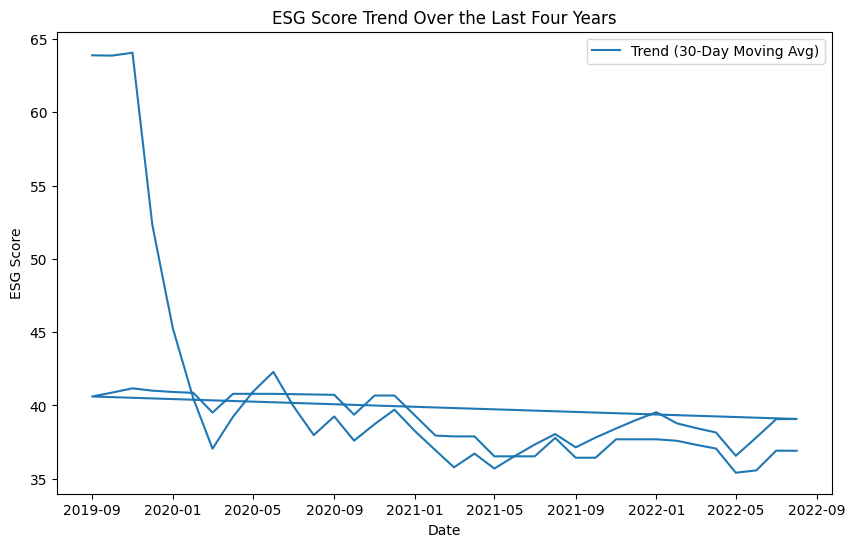

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(last_four_years['Date'], last_four_years['Trend'], label=f'Trend ({window_size}-Day Moving Avg)')
plt.xlabel('Date')
plt.ylabel('ESG Score')
plt.title('ESG Score Trend Over the Last Four Years')
plt.legend()
plt.show()

In [63]:
nike_esg_copy['Seasonality'] = nike_esg_copy['ESGScore'] - nike_esg_copy['Trend']

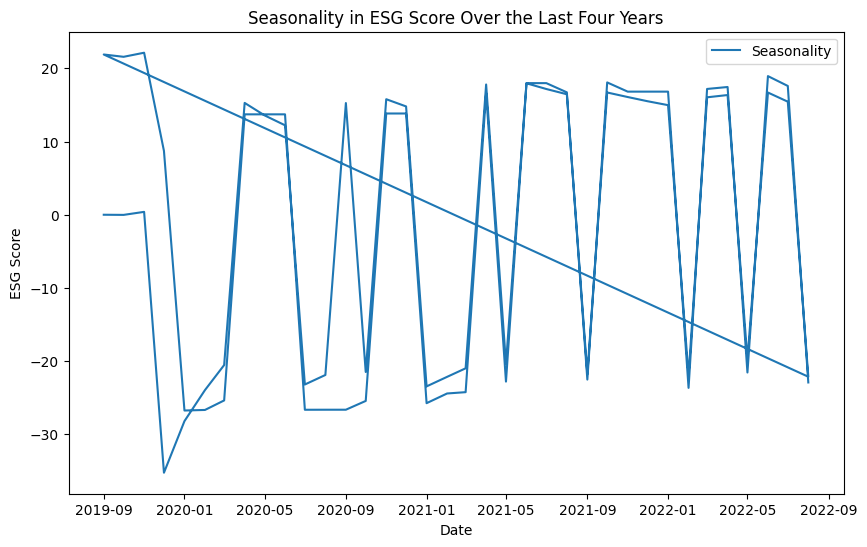

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(nike_esg_copy['Date'], nike_esg_copy['Seasonality'], label='Seasonality')
plt.xlabel('Date')
plt.ylabel('ESG Score')
plt.title('Seasonality in ESG Score Over the Last Four Years')
plt.legend()
plt.show()

## Stock Price Prediction

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
stock = nike_stock[['Date','Open', 'High', 'Low', 'Volume']]
stock.head()

,Date,Open,High,Low,Volume
0,2019-08-14,81.239998,81.690002,80.510002,7266100
1,2019-08-15,80.930000,81.300003,79.440002,6713600
2,2019-08-16,80.089996,80.559998,79.250000,5649000
3,2019-08-19,82.000000,82.339996,80.830002,7027900
4,2019-08-20,80.720001,81.230003,79.449997,5903100


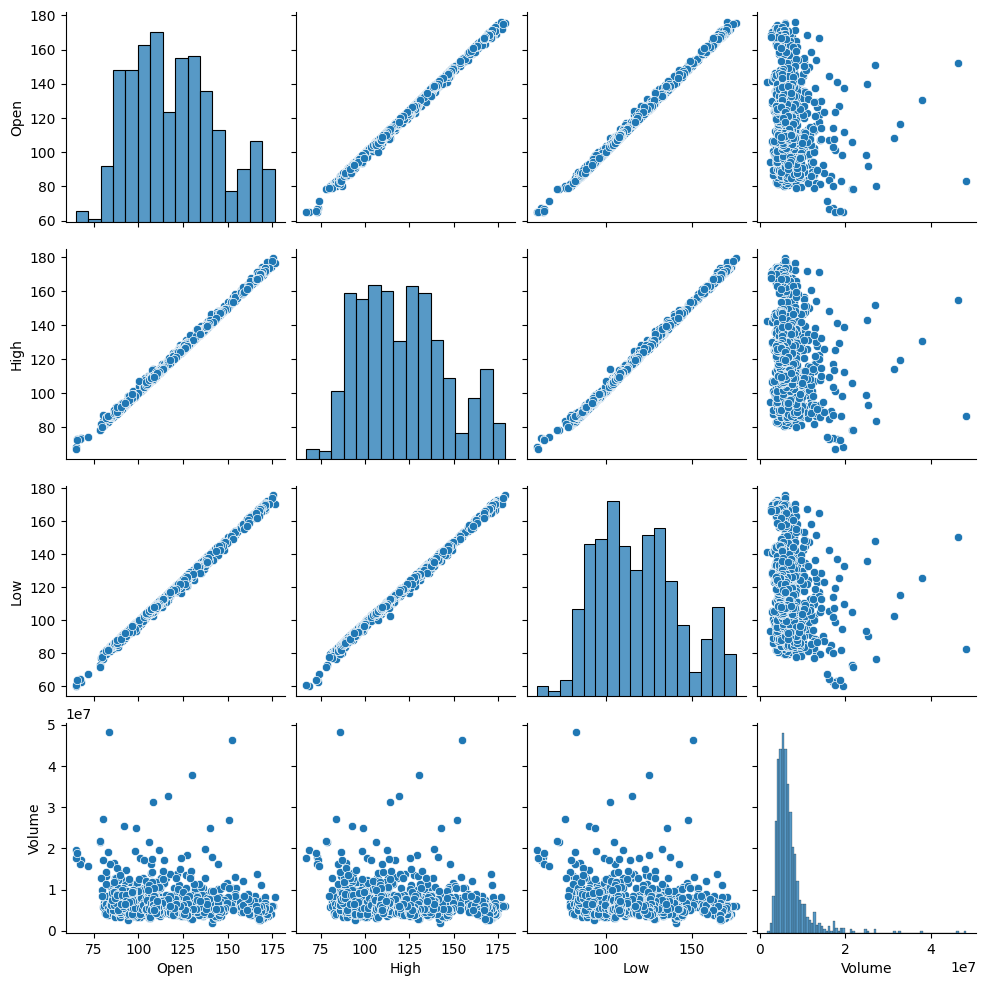

In [67]:
sns.pairplot(stock)

## <font color='red'>XGBoost</font>

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
stocks=nike_stock.copy()

In [46]:
stocks.drop(columns=['Trend','Seasonality','NumericalDate'])
stocks.head()

,Date,Open,High,Low,Close,Adj Close,Volume,NumericalDate,Trend,Seasonality
0,2019-08-14,81.239998,81.690002,80.510002,81.029999,77.932030,7266100,0,81.029999,0.000000
1,2019-08-15,80.930000,81.300003,79.440002,79.510002,76.470139,6713600,1,80.270001,-0.759999
2,2019-08-16,80.089996,80.559998,79.250000,80.279999,77.210701,5649000,2,80.273333,0.006666
3,2019-08-19,82.000000,82.339996,80.830002,81.129997,78.028206,7027900,5,80.487499,0.642498
4,2019-08-20,80.720001,81.230003,79.449997,80.529999,77.451149,5903100,6,80.495999,0.034000


In [47]:
features = ['Open', 'High', 'Low', 'Volume']
x= stocks[features]
y = stocks['Close']

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [69]:
from xgboost import XGBRegressor

In [70]:
model = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 10)

In [71]:
model.fit(X_train, Y_train)

[14:47:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [72]:
y_pred = model.predict(X_test)

Evaluating model

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, Y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, Y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))

Mean Absolute Error : 43.889769919732124
Mean Squared Error : 2043.004700104878
Root Mean Squared Error : 45.19960951274776


In [74]:
from xgboost import cv, DMatrix

data_dmatrix = DMatrix(data=x, label=y)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,'max_depth': 5,'alpha': 10}

results = cv(dtrain=data_dmatrix, params=params, nfold=3,
                num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

[14:47:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:47:34] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [75]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,110.169925,0.854048,110.142772,1.701264
1,99.390091,0.848489,99.344871,1.509371
2,89.672173,0.850098,89.563331,1.351169
3,80.807545,0.767439,80.715501,1.247464
4,73.138869,0.733628,73.056508,1.287192


In [76]:
from xgboost import train

xg_reg = train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:47:47] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


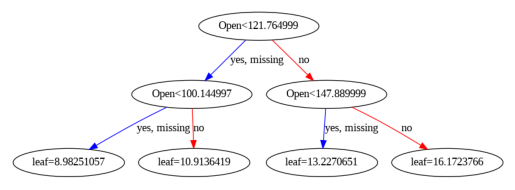

In [77]:
import matplotlib.pyplot as plt
from xgboost import plot_tree

plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [1000, 1000]
plt.show()


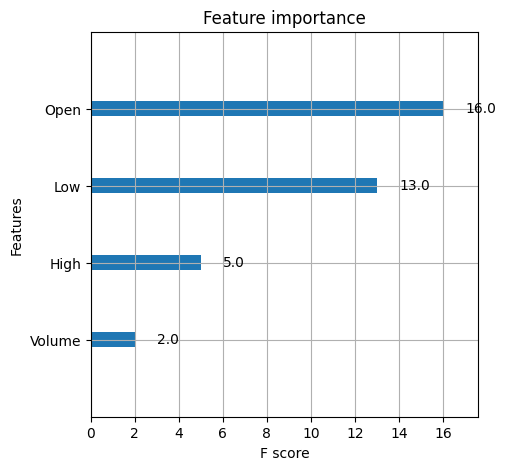

In [78]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(5, 5))
plot_importance(xg_reg, ax=ax)
plt.show()

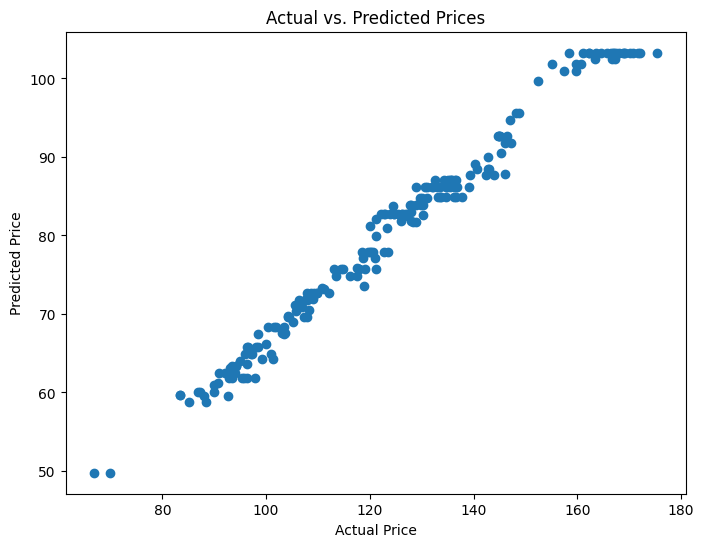

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [80]:
import plotly.express as px

fig = px.line(stocks, x='Date', y='Close', title='Interactive Stock Price Plot')
fig.show()

## <font color='red'>LGBM</font>

In [81]:
from sklearn.model_selection import train_test_split
features = ['Open', 'High', 'Low', 'Volume']
x= stocks[features]
y = stocks['Close']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [82]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [83]:
from lightgbm import LGBMRegressor
LGBM = LGBMRegressor(n_estimators = 1000)
LGBM.fit(X_train,Y_train)
y_pred = LGBM.predict(X_test)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 804, number of used features: 4
[LightGBM] [Info] Start training from score 120.028333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Evaluating the model

In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred, Y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred, Y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred, Y_test))))

Mean Absolute Error : 0.9037798455301554
Mean Squared Error : 1.7453163491627364
Root Mean Squared Error : 1.3211042158598754


## <font color='red'>LSTM</font>

In [86]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
%matplotlib inline

In [87]:
train = stocks.iloc[0:int(len(stocks)*0.8), :]
test =  stocks.iloc[int(len(stocks)*0.8):, :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (804, 202)


In [88]:
X_train, Y_train = [], []
for i in range(len(train) - 3):
  a = train.iloc[i:(i + 3), 4]
  X_train.append(a)
  Y_train.append(train.iloc[i + 3, 4])
print(len(Y_train))

801


In [89]:
X_test, Y_test = [], []
for i in range(len(test) - 3):
  a = test.iloc[i:(i + 3), 5]
  X_test.append(a)
  Y_test.append(test.iloc[i + 3, 5])
print(len(Y_test))

199


In [90]:
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

LSTM Model

In [91]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100,  activation='relu', return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

In [92]:
model.compile(loss='mae', optimizer='adam')

In [93]:
history = model.fit(X_train, Y_train, epochs=30, batch_size=100, validation_split=0.2, verbose=2, shuffle=False)

Epoch 1/30
7/7 - 4s - loss: 117.6041 - val_loss: 102.5954 - 4s/epoch - 574ms/step
Epoch 2/30
7/7 - 0s - loss: 107.6086 - val_loss: 92.0590 - 113ms/epoch - 16ms/step
Epoch 3/30
7/7 - 0s - loss: 96.0173 - val_loss: 80.0453 - 139ms/epoch - 20ms/step
Epoch 4/30
7/7 - 0s - loss: 79.4335 - val_loss: 59.7098 - 144ms/epoch - 21ms/step
Epoch 5/30
7/7 - 0s - loss: 54.2956 - val_loss: 34.0775 - 136ms/epoch - 19ms/step
Epoch 6/30
7/7 - 0s - loss: 24.1834 - val_loss: 3.8967 - 138ms/epoch - 20ms/step
Epoch 7/30
7/7 - 0s - loss: 10.8957 - val_loss: 12.8825 - 139ms/epoch - 20ms/step
Epoch 8/30
7/7 - 0s - loss: 6.7559 - val_loss: 4.0115 - 115ms/epoch - 16ms/step
Epoch 9/30
7/7 - 0s - loss: 7.3619 - val_loss: 4.6269 - 115ms/epoch - 16ms/step
Epoch 10/30
7/7 - 0s - loss: 3.5176 - val_loss: 4.5599 - 126ms/epoch - 18ms/step
Epoch 11/30
7/7 - 0s - loss: 2.4013 - val_loss: 3.2866 - 126ms/epoch - 18ms/step
Epoch 12/30
7/7 - 0s - loss: 2.7229 - val_loss: 3.3618 - 155ms/epoch - 22ms/step
Epoch 13/30
7/7 - 0s - 

Evaluating model

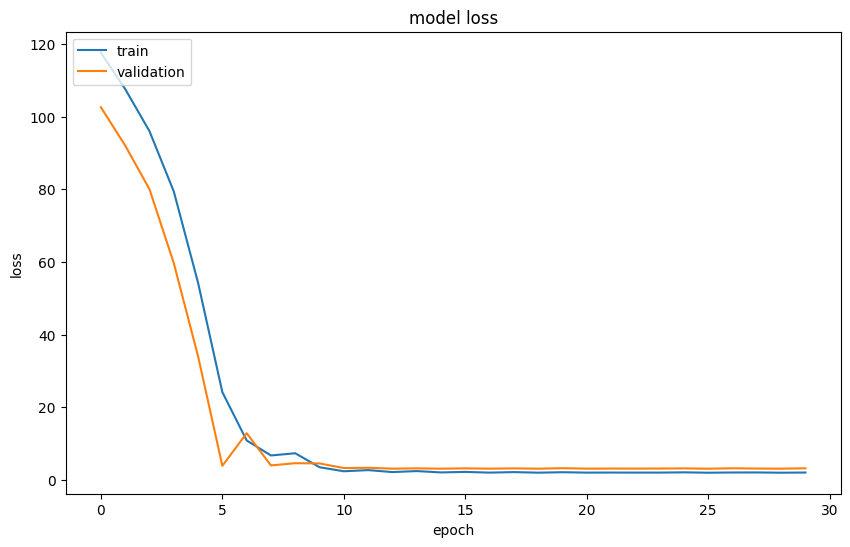

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


7/7 [==============================] - 1s 3ms/step


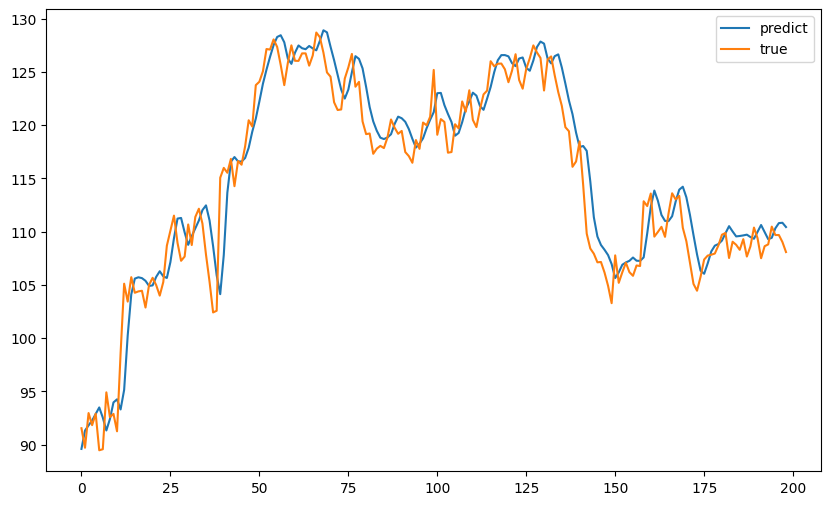

In [95]:
plt.figure(figsize=(10, 6))
y_pred = model.predict(X_test)
plt.plot(y_pred, label='predict')
plt.plot(Y_test, label='true')
plt.legend()
plt.show()

In [96]:
from sklearn.metrics import r2_score
r2_score(y_pred,Y_test)

0.9223872286051427